In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

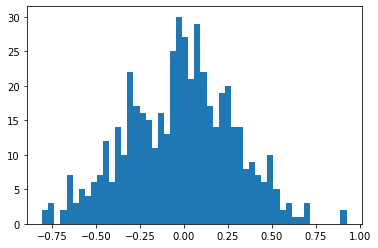

In [2]:
# https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy
def get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1):
    return truncnorm(
        (low - mean)/sd, 
        (upp - mean)/sd, 
        loc = mean, 
        scale = sd)

X = get_truncated_normal()
plt.hist(X.rvs(500), bins = 50)
plt.show()

In [3]:
class post:
    
    def __init__(self, user_id, kind, user_ideology, user_trust):
        self.type = kind   # binary: either post (1) or comment (0)
        self.author = user_id
        
        # post's ideology score
        self.ideology = get_truncated_normal(mean=user_ideology, sd=0.2, low=-1, upp=1).rvs()  
        
        # post's trustworthiness
        self.trust = get_truncated_normal(mean=user_trust, sd=0.1, low=0, upp=1).rvs()  

In [4]:
class user:
    def __init__(self):
        self.ideology = get_truncated_normal(mean=0, sd=0.3, low=-1, upp=1).rvs()
        # care value is dependent on the absolute value of ideology value of the user + noise,
        # on the assumption based on research that reveals people with more radial political leanings tend to be more engaging
        self.care = get_truncated_normal(mean=abs(self.ideology), sd = 0.15, low = 0, upp=1).rvs()
        self.trust = get_truncated_normal(mean=0.5, sd=0.15, low=0, upp=1).rvs()   # post's trustworthiness
        
def create_n_users (n):
    user_list = []
    for i in range(n):
        user_list.append(user())
    return user_list

In [20]:
def create_posts(users):
    post_list = []
    for j in range(len(users)):
        user = users[j]
        num_posts = round((abs(user.ideology)*10)+(user.care*10), 0)
        for i in range(int(num_posts)):
            post_list.append(post(j, 1, user.ideology, user.trust))
    return post_list
            
def recommend_n_by_user_post (posts, users, n):
    #aggregate each post.ideology by users
    user_all_posts = {}
    for post in posts:
        if post.author not in user_all_posts.keys():
            user_all_posts[post.author] = []
        user_all_posts[post.author].append(post.ideology)
        
    #populate the user - ideology mean dictionary
    user_ideology_from_posts = {}
    for user in range(len(users)):
        if user in user_all_posts.keys():
            user_ideology_from_posts[user] = sum(user_all_posts[user])/len(user_all_posts[user])
        else:
            user_ideology_from_posts[user] = 0
            
    recommended_posts = {}
    
    for user in range(len(users)):
        diff = {}
        for post in posts:
            if not post.author == user:
                diff[post] = abs(user_ideology_from_posts[user] - post.ideology)
        new_diff = dict(sorted(diff.items(), key = lambda item: item[1]))
        result = list(new_diff.keys())
        new_result = []
        for i in range(n):
            #print(diff[result[i]])
            new_result.append(result[i])
        recommended_posts[user] = new_result
    return recommended_posts
        
        
    
users = create_n_users(100)
posts = create_posts(users)
recommend_n_by_user_post(posts, users, 10)

0.0027889527896311495
0.005399803293213212
0.0057970748693771945
0.007264298389541235
0.007730518157449684
0.008824866419234884
0.013792307080150612
0.015405487276287821
0.0196160396656605
0.02065769550218316
0.0010117334845811676
0.002273465706815414
0.0027966264268591834
0.006945586439123019
0.007407169860036422
0.007932196214702425
0.008840325666118809
0.009404046165562563
0.01641649154743363
0.016440742248929774
0.0019548149863492237
0.0021153027301376026
0.0025971469611384412
0.0028060212353407388
0.0029977985427061538
0.003611720678650232
0.004529641821315378
0.005693342662073747
0.010801857702902484
0.01195594970154712
0.001116184005055143
0.001391796826234859
0.00169096605582425
0.002701365598126615
0.00321113820839386
0.004282085063179453
0.009136995511633328
0.009925669587868169
0.011186932166099839
0.012305039994351508
0.0004846989228473736
0.0014016314845590322
0.0021467357869175696
0.0032518407525317095
0.006664018277238448
0.006817110972439949
0.007039203334060079
0.01103

{0: [<__main__.post at 0x7fdb702bcdc0>,
 1: [<__main__.post at 0x7fdb70088c40>,
 2: [<__main__.post at 0x7fdb6ffac5b0>,
 3: [<__main__.post at 0x7fdb700285e0>,
 4: [<__main__.post at 0x7fdb6ffd38e0>,
 5: [<__main__.post at 0x7fdb70091e50>,
 6: [<__main__.post at 0x7fdb70066a90>,
 7: [<__main__.post at 0x7fdb6ffb1340>,
 8: [<__main__.post at 0x7fdb7006e880>,
 9: [<__main__.post at 0x7fdb7009cc70>,
 10: [<__main__.post at 0x7fdb70295490>,
 11: [<__main__.post at 0x7fdb70075280>,
 12: [<__main__.post at 0x7fdb700901c0>,
 13: [<__main__.post at 0x7fdb6ffb5640>,
 14: [<__main__.post at 0x7fdb7005c190>,
 15: [<__main__.post at 0x7fdb70092f40>,
 16: [<__main__.post at 0x7fdb70075e20>,
 17: [<__main__.post at 0x7fdb70075f10>,
 18: [<__main__.post at 0x7fdb70051d30>,
 19: [<__main__.post at 0x7fdb70063a00>,
 20: [<__main__.post at 0x7fdb70238490>,
 21: [<__main__.post at 0x7fdb7006e1f0>,
 22: [<__main__.post at 0x7fdb7006e1f0>,
 23: [<__main__.post at 0x7fdb70068b80>,
 24: [<__main__.post at 0x